### Ensemble models

Installing python libraries

In [1]:
!pip install matplotlib numpy pandas scikit-learn dask "dask[dataframe]" seaborn

Defaulting to user installation because normal site-packages is not writeable


Importing python libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Getting the dataset

In [39]:
dataset = '../Datasets/Small_datasetPreprocessed2.parquet'

if os.path.exists(dataset):
    df = pd.read_parquet(dataset)
    df = df.dropna()
else:
    print("Dataset not found")

Training

In [40]:
# Define train, test, validation sets
X = df.drop(['total_amount'], axis=1)
y = df['total_amount']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Functions to plot the models results

In [41]:
def plot_grid_search_heatmap(grid_search, param1, param2, metric="mean_test_score"):
    results = grid_search.cv_results_
    scores = results[metric].reshape(len(grid_search.param_grid[param1]), len(grid_search.param_grid[param2]))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=grid_search.param_grid[param2],
                yticklabels=grid_search.param_grid[param1], cmap="viridis")
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.title(f"GridSearchCV Heatmap")
    plt.show()

def plot_predictions_vs_true(y_true, y_pred, model_name="Model"):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.6, color="blue", label="Predictions")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--", label="Ideal Fit")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Predictions vs True Values")
    plt.legend()
    plt.grid()
    plt.show()

def plot_model_comparison(models, metrics, metric_name="R2 Score"):
    plt.figure(figsize=(10, 6))
    plt.bar(models, metrics, color=["blue", "orange", "green", "purple"])
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"Comparison of {metric_name} Across Models")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    y_min = math.floor(min(metrics) / 0.05) * 0.05
    y_max = max(max(metrics), 1.0)
    plt.ylim(y_min, y_max)
    for i, v in enumerate(metrics):
        plt.text(i, v + 0.002, f"{v:.3f}", ha="center", va="bottom")
    plt.show()


Random Forest Regressor ensemble model with grid search for the best parameters

Best Parameters: {'max_features': 10, 'n_estimators': 50}
Best R^2 Score: 0.9867173918429221


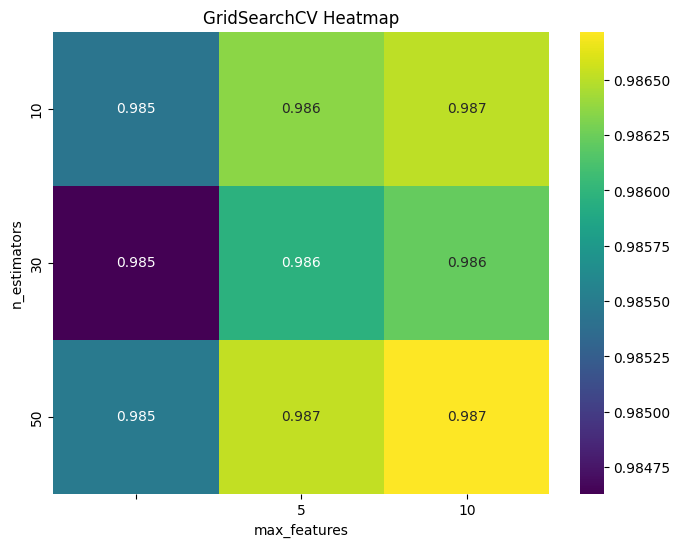

In [42]:
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_features': [None, 5, 10],
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_val, y_val)

print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

plot_grid_search_heatmap(grid_search, "n_estimators", "max_features")

Mean Squared Error: 0.7157004288086669
Mean Absolute Error: 0.3602054382740192
R^2 Score: 0.9876604356964053


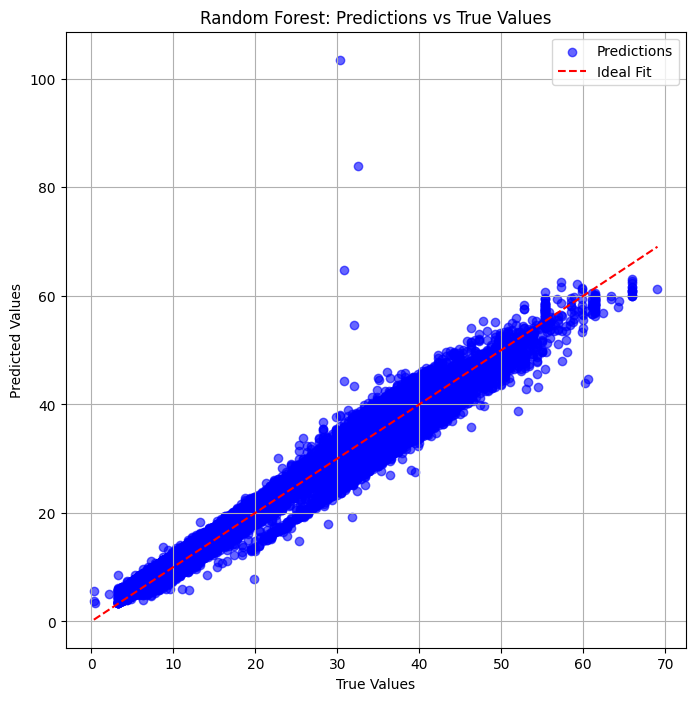

In [43]:
bagging_rf = RandomForestRegressor(n_estimators=50, max_features=5, random_state=42)
bagging_rf.fit(X_train, y_train)

y_pred = bagging_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2_random_forest)

plot_predictions_vs_true(y_test, y_pred, "Random Forest")

AdaBoost Regressor ensemble model with grid search for the best parameters

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 30}
Best R^2 Score: 0.9545123284982321


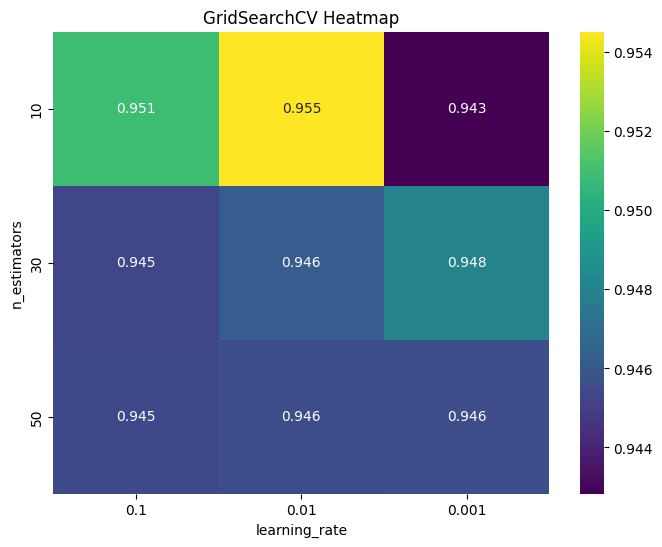

In [44]:
param_grid = {
    'n_estimators': [10, 30, 50],
    'learning_rate': [0.1, 0.01, 0.001],
}
grid_search = GridSearchCV(
    estimator=AdaBoostRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_val, y_val)

print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

plot_grid_search_heatmap(grid_search, "n_estimators", "learning_rate")

Mean Squared Error: 5.432772793377425
Mean Absolute Error: 1.7842605588060003
R^2 Score: 0.9063322494548588


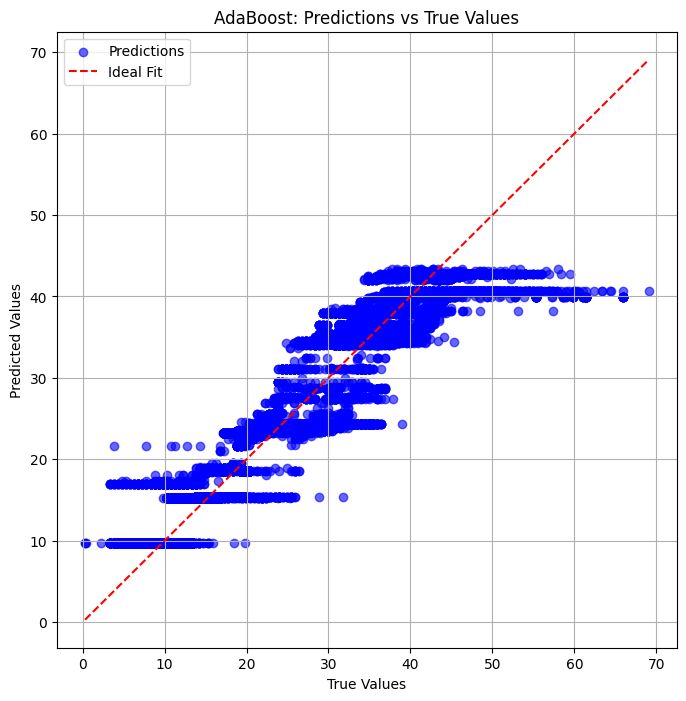

In [45]:
boosting_ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
boosting_ada.fit(X_train, y_train)

y_pred = boosting_ada.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_adaboost = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2_adaboost)

plot_predictions_vs_true(y_test, y_pred, "AdaBoost")

Gradient Boosting Regressor ensemble model with grid search for the best parameters

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best R^2 Score: 0.9806577367914775


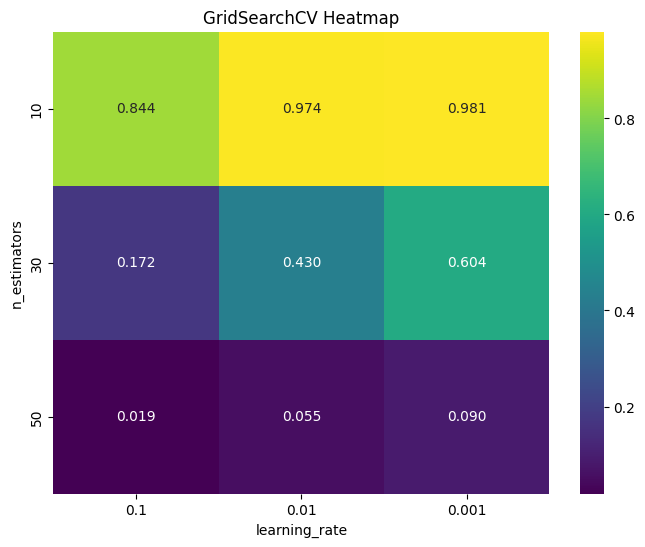

In [46]:
param_grid = {
    'n_estimators': [10, 30, 50],
    'learning_rate': [0.1, 0.01, 0.001],
}
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_val, y_val)

print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

plot_grid_search_heatmap(grid_search, "n_estimators", "learning_rate")

Mean Squared Error: 1.117905738026737
Mean Absolute Error: 0.5802632526778115
R^2 Score: 0.9807259166203095


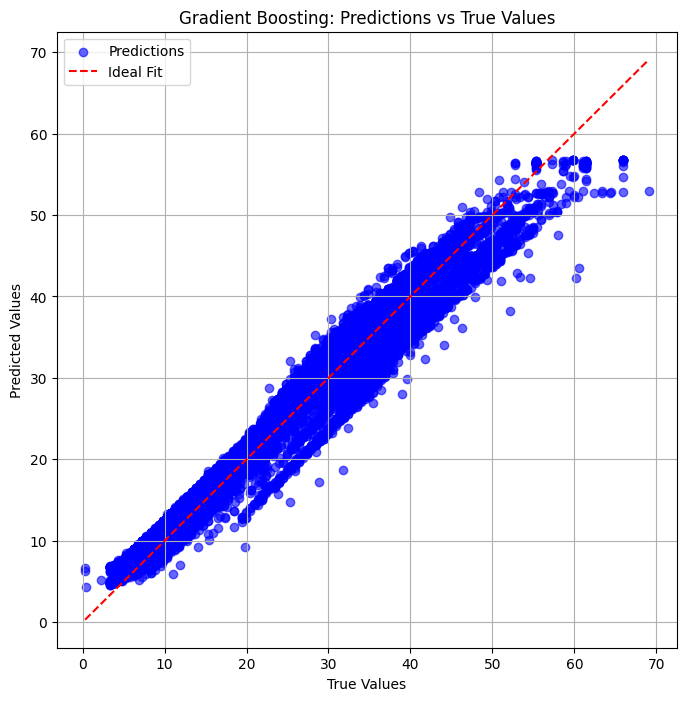

In [47]:
boosting_grad = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
boosting_grad.fit(X_train, y_train)

y_pred = boosting_grad.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_gradboost = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2_gradboost)

plot_predictions_vs_true(y_test, y_pred, "Gradient Boosting")

Stacking ensemble model

Mean Squared Error: 1.6158183671625839
Mean Absolute Error: 0.5686376223787933
R^2 Score: 0.9721412844788689


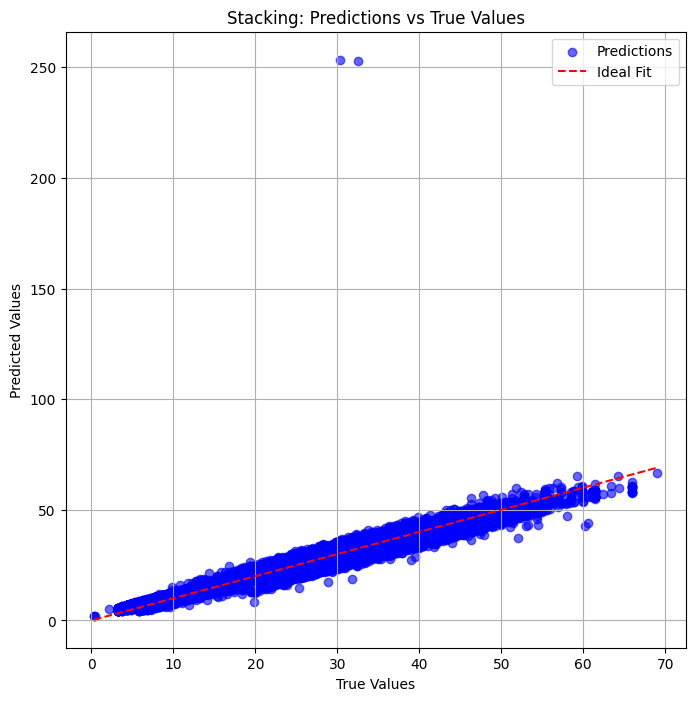

In [48]:
# Define the base and meta models
base_learners = [
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('el', ElasticNet(alpha=0.1, l1_ratio=0.5))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_stacking = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2_stacking)

plot_predictions_vs_true(y_test, y_pred, "Stacking")

Models evaluation

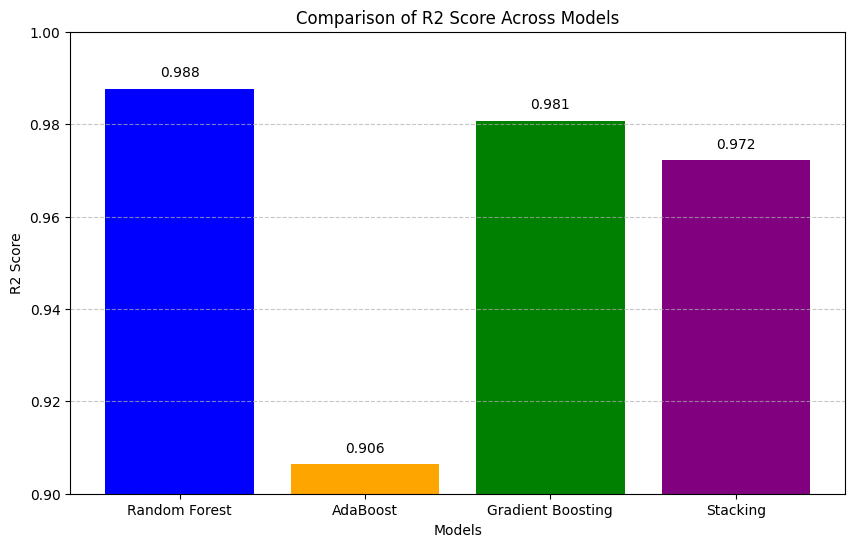

In [50]:
models = ["Random Forest", "AdaBoost", "Gradient Boosting", "Stacking"]
metrics = [r2_random_forest, r2_adaboost, r2_gradboost, r2_stacking]
plot_model_comparison(models, metrics, "R2 Score")